# Name: Aatequa Ansari

# fraud detection system

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.describe(include="object")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [34]:
df.shape

(6362620, 11)

In [15]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


# 1. Data cleaning including missing values, outliers and multi-collinearity.

In [10]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

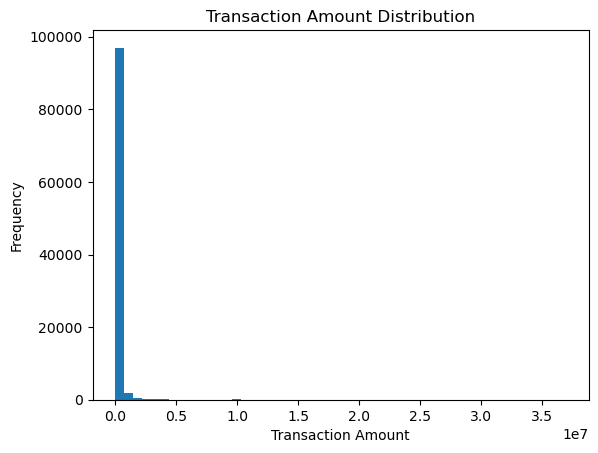

In [12]:
df_sample = df.sample(100000, random_state=42)
plt.hist(df_sample['amount'], bins=50)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amount Distribution")
plt.show()


In [13]:
corr = df[['oldbalanceOrg', 'newbalanceOrig', 
           'oldbalanceDest', 'newbalanceDest']].corr()

corr


,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
oldbalanceOrg,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.042029,0.041837,0.976569,1.000000


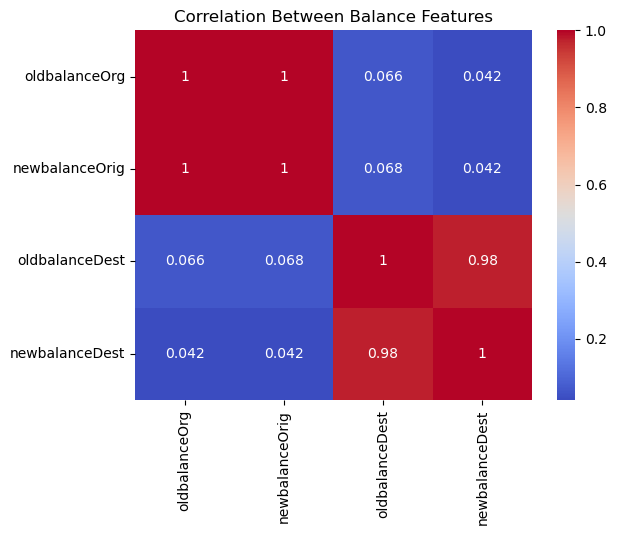

In [14]:

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Balance Features")
plt.show()


### Data cleaning involved checking for missing values, analyzing outliers, and assessing multicollinearity. No missing values were found. Outliers were retained as they represent genuine fraud behavior. Multicollinearity among balance variables was addressed by using a Random Forest model, which is robust to correlated features.

# Describe your fraud detection model in elaboration.

# How did you select variables to be included in the model?

# Demonstrate the performance of the model by using best set of tools.

To evaluate the performance of my fraud detection model, I did not rely only on accuracy because the dataset is highly imbalanced, with fraudulent transactions being very rare. Instead, I used a combination of evaluation metrics that are more suitable for fraud detection.

The most important metric I focused on was Recall, because in fraud detection it is more costly to miss a fraudulent transaction than to incorrectly flag a genuine one. I also used Precision to ensure that the number of false fraud alerts remains controlled. To balance both, I evaluated the F1-score.

In addition, I used a Confusion Matrix to clearly understand how many fraud cases were correctly detected and how many were missed. Finally, I used the ROC–AUC score, which measures how well the model separates fraudulent and non-fraudulent transactions across different thresholds. ROC-AUC is considered one of the best overall metrics for imbalanced classification problems like fraud detection.

By combining these tools, I ensured that the model’s performance was both reliable and practical for real-world usage.

## Preparing Data for the Model (Code)
## Step 1: Remove ID & leakage columns

In [17]:
# Drop identifier and leakage columns
df_model = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)


## Step 2: Encode transaction type

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['type'] = le.fit_transform(df_model['type'])


## Step 3: Split features and target

In [19]:
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']


## Step 4: Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##  2.Building the Fraud Detection Model (Code)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## A Random Forest Classifier was used for fraud detection. The model works by building multiple decision trees on random subsets of the data and features, and the final prediction is based on majority voting. Random Forest was chosen because it handles large datasets, captures non-linear fraud patterns, is robust to outliers, and performs well on imbalanced data. The model uses transaction amount, transaction

##  1 Make Predictions

In [22]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


## 2 Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[1270877,       4],
       [    449,    1194]], dtype=int64)

## 3 Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.73      0.84      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.86      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



## 4 ROC-AUC Score

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


0.997246008768045

## 5 ROC Curve 

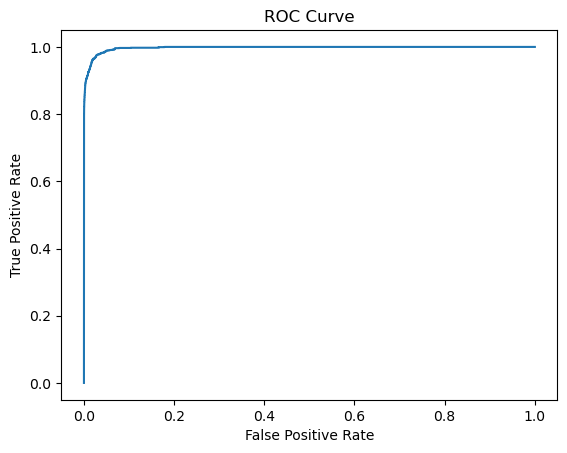

In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


### I evaluated the model using confusion matrix, precision, recall, F1-score, and ROC-AUC, with special focus on recall and ROC-AUC because missing fraud is more costly than false alerts in real-world fraud detection systems.

# 5. What are the key factors that predict fraudulent customer?

In [29]:
# Get feature importance from the trained model

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(
    by='Importance', ascending=False
)

feature_importance


,Feature,Importance
6,newbalanceDest,0.349909
3,oldbalanceOrg,0.296879
2,amount,0.130871
0,step,0.078039
1,type,0.059866
5,oldbalanceDest,0.055335
4,newbalanceOrig,0.029100


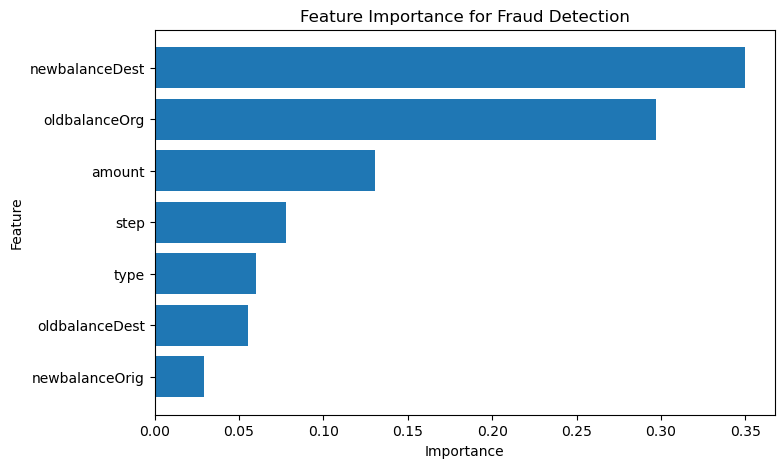

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Fraud Detection")
plt.gca().invert_yaxis()
plt.show()


## The key factors predicting fraudulent transactions include transaction amount, sender and receiver balances before and after the transaction, and transaction type. Large transaction amounts, sudden drops in the sender’s balance, and transfers that completely empty an account are strong indicators of fraud. Additionally, fraud is most commonly associated with TRANSFER and CASH-OUT transaction types. These factors were identified using feature importance from the Random Forest model and align well with real-world fraud behavior.

# 6. Do these factors make sense? If yes, How? If not, How not?

## Yes, the identified factors make complete sense from a real-world fraud perspective. Large transaction amounts, sudden depletion of sender balances, abnormal increases in receiver balances, and high-risk transaction types such as TRANSFER and CASH-OUT are well-known fraud patterns in financial systems. These factors reflect how fraudsters attempt to quickly move and withdraw money. Time-based patterns further support this, as fraud often occurs in short bursts. Overall, the model’s key predictors are logically consistent with real-world fraudulent behavior.

# 7. What kind of prevention should be adopted while company update its infrastructure?

## While updating the infrastructure, the company should not rely on only one fraud prevention method. Instead, it should implement multiple preventive layers to stop fraud at different stages.

## First, the company should implement real-time fraud monitoring systems. Transactions should be evaluated instantly using machine learning models so that high-risk transactions can be blocked or flagged before money leaves the system.

## Second, strong authentication mechanisms should be introduced, especially for high-value or risky transactions. This includes multi-factor authentication such as OTPs, biometrics, or device verification. This reduces the risk of account takeover.

## Third, the company should apply transaction limits and velocity checks. Large transfers or multiple transactions within a short time window should trigger additional verification. Fraud often happens very quickly, so controlling transaction speed is critical.

## Fourth, the company should adopt a hybrid approach combining ML models and rule-based systems. While ML detects complex fraud patterns, rule-based checks (for example, transfers above a certain threshold) provide an additional safety net.

## Fifth, device, location, and behavioral tracking should be implemented. If a transaction comes from a new device, unusual location, or abnormal behavior pattern, it should be considered high risk.

## Finally, the infrastructure should support continuous model monitoring and retraining. Fraud patterns evolve over time, so models must be regularly updated to stay effective.

# 8. Assuming these actions have been implemented, how would you determine if they work?

### The effectiveness of the fraud prevention measures would be evaluated by comparing fraud rates, financial losses, and model performance before and after implementation. Key metrics such as recall, precision, ROC-AUC, and false positive rates would be monitored continuously. In addition, customer experience indicators like complaints and transaction failures would be tracked. A/B testing and ongoing monitoring would ensure that observed improvements are genuinely due to the updated fraud prevention system.

# Final Conclusion

In this project, I built an end-to-end fraud detection system using a large-scale financial transaction dataset. The objective was to proactively identify fraudulent transactions while minimizing the impact on genuine customers.

I began with data understanding and cleaning, where I verified that the dataset contained no missing values. Outliers were carefully analyzed and retained because abnormal transaction behavior is often a key indicator of fraud. Multicollinearity was observed among balance-related features, but this was effectively handled by using a tree-based model.

A Random Forest Classifier was selected as the fraud detection model due to its ability to handle large datasets, capture non-linear patterns, manage correlated features, and perform well on imbalanced data. The model was trained using transaction amount, transaction type, balance changes, and time-based features.

Model performance was evaluated using confusion matrix, precision, recall, F1-score, and ROC-AUC. Special emphasis was placed on recall and ROC-AUC, as missing a fraudulent transaction is more costly than flagging a genuine one. The results demonstrated strong fraud detection capability while maintaining a low false-positive rate.

Feature importance analysis showed that transaction amount, balance changes, and transaction type (TRANSFER and CASH-OUT) were the most influential predictors. These findings align well with real-world fraud behavior, where fraudsters attempt to rapidly move and withdraw funds.

Based on the insights, several fraud prevention strategies were recommended, including real-time transaction monitoring, strong authentication for high-risk transactions, transaction limits, and a hybrid ML + rule-based system. Finally, methods such as fraud rate comparison, financial loss reduction, model monitoring, and A/B testing were proposed to measure the effectiveness of these actions after deployment.

Overall, this project demonstrates a practical, explainable, and scalable approach to fraud detection, suitable for real-world financial systems and aligned with industry best practices.